# Introduction to Convolutional Neural Networks and Computer Vision with tensorFlow

Computer vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data 

The images we're working with are from the Food101 dataset (101 different classes of food)

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook.

> **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-07-15 12:44:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  50.8MB/s    in 2.1s    

2022-07-15 12:44:37 (50.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizin many samples of your data

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os 

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names progammatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir +target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlb
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['333985.jpg']
Image shape: (512, 382, 3)


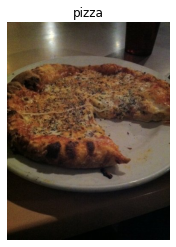

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[ 71,  45,  22],
        [ 70,  44,  21],
        [ 67,  43,  19],
        ...,
        [ 52,  52,  44],
        [ 51,  50,  45],
        [ 49,  48,  43]],

       [[ 94,  68,  45],
        [ 96,  70,  47],
        [ 92,  68,  44],
        ...,
        [ 56,  56,  48],
        [ 58,  58,  50],
        [ 57,  56,  51]],

       [[101,  75,  50],
        [106,  80,  55],
        [102,  76,  51],
        ...,
        [ 59,  59,  51],
        [ 59,  59,  51],
        [ 56,  55,  50]],

       ...,

       [[  7,   9,   4],
        [  6,   8,   3],
        [  5,   7,   2],
        ...,
        [  5,   7,   6],
        [  5,   7,   6],
        [  5,   7,   6]],

       [[  8,  10,   5],
        [  7,   9,   4],
        [  6,   8,   3],
        ...,
        [  5,   7,   6],
        [  6,   8,   7],
        [  6,   8,   7]],

       [[  7,  10,   3],
        [  6,   9,   2],
        [  5,   8,   1],
        ...,
        [  5,   7,   

In [11]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 382, 3)

> **Note:** As we#ve discussed before, many machnie learning model, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the macimum pixel value).

In [12]:
# Get all teh pixel values between 0 & 1
img/255.

array([[[0.27843137, 0.17647059, 0.08627451],
        [0.2745098 , 0.17254902, 0.08235294],
        [0.2627451 , 0.16862745, 0.0745098 ],
        ...,
        [0.20392157, 0.20392157, 0.17254902],
        [0.2       , 0.19607843, 0.17647059],
        [0.19215686, 0.18823529, 0.16862745]],

       [[0.36862745, 0.26666667, 0.17647059],
        [0.37647059, 0.2745098 , 0.18431373],
        [0.36078431, 0.26666667, 0.17254902],
        ...,
        [0.21960784, 0.21960784, 0.18823529],
        [0.22745098, 0.22745098, 0.19607843],
        [0.22352941, 0.21960784, 0.2       ]],

       [[0.39607843, 0.29411765, 0.19607843],
        [0.41568627, 0.31372549, 0.21568627],
        [0.4       , 0.29803922, 0.2       ],
        ...,
        [0.23137255, 0.23137255, 0.2       ],
        [0.23137255, 0.23137255, 0.2       ],
        [0.21960784, 0.21568627, 0.19607843]],

       ...,

       [[0.02745098, 0.03529412, 0.01568627],
        [0.02352941, 0.03137255, 0.01176471],
        [0.01960784, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images 
* Preprocess our images 
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                                class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Conv2D(filters=10,
                                                      kernel_size=3,
                                                      activation="relu",
                                                      input_shape=(224,224, 3)),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(pool_size=2,
                                                         padding="valid"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.Conv2D(10,3,activation="relu"),
                               tf.keras.layers.MaxPool2D(2),
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 216ms/step - loss: 0.5658 - accuracy: 0.7000 - val_loss: 0.3968 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4126 - accuracy: 0.8160 - val_loss: 0.3527 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3700 - accuracy: 0.8393 - val_loss: 0.2983 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 10s 224ms/step - loss: 0.3663 - accuracy: 0.8493 - val_loss: 0.3447 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3126 - accuracy: 0.8773 - val_loss: 0.2778 - val_accuracy: 0.8800


> **Note:** If the above vell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU
(you may have to rerun some cells again above).

In [14]:
len(train_data)

47

In [15]:
1500/32 # 47 patches with 32 images

46.875

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playgroung model
model_2=tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(224,224,3)),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
histroy_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 0.7655 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.4747 - val_loss: 0.6931 - val_accuracy: 0.5000


In [18]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters then our CNN (model_1) model_2 performs terribly...let's improve it

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 2.3124 - accuracy: 0.6320 - val_loss: 0.7008 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 1.2439 - accuracy: 0.6793 - val_loss: 0.6289 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7286 - accuracy: 0.7200 - val_loss: 0.5052 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.5528 - accuracy: 0.7653 - val_loss: 0.4487 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.5514 - accuracy: 0.7727 - val_loss: 0.4641 - val_accuracy: 0.7940


In [20]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> **Note:** You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different features in an image.

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['2532239.jpg']
Image shape: (384, 512, 3)
['1907713.jpg']
Image shape: (512, 512, 3)


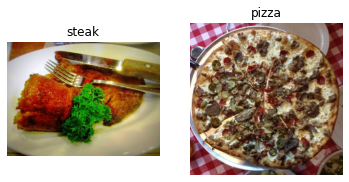

In [22]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rther than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result inthe model not being able to learn very well.

Why 32?

Because 32 is good for your health...

In [24]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in the train_data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
         kernel_size=(3,3), # the size of the sliding window going across an input
         strides=(1,1), # the size of the step the sliding window takes acrouss an input
         padding="valid", # if "same", output shape is same as input shape, if "valid" output shape gets compressed
         activation="relu",
         input_shape=(224,224,3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

In [32]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [33]:
# Get a summary of aour model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [34]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [35]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 206ms/step - loss: 0.9874 - accuracy: 0.6953 - val_loss: 0.4318 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 13s 278ms/step - loss: 0.4229 - accuracy: 0.8200 - val_loss: 0.3706 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.2835 - accuracy: 0.8893 - val_loss: 0.3542 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.1175 - accuracy: 0.9667 - val_loss: 0.4567 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 10s 215ms/step - loss: 0.0334 - accuracy: 0.9893 - val_loss: 0.5612 - val_accuracy: 0.8040


In [36]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 138ms/step - loss: 0.2778 - accuracy: 0.8800


[0.27781882882118225, 0.8799999952316284]

### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it

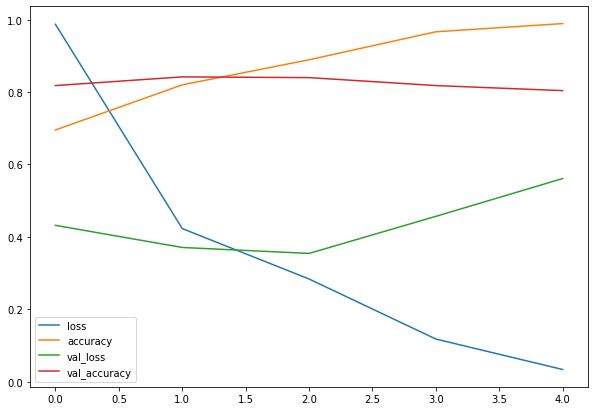

In [37]:
# Let's plot the training curve
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [38]:
# Plot the validation and traing curves separately
def plot_loss_curves(history):
  """
  Returns separate loss cureves for training and validatoin metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs sis we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> **Note:** When a model's **validation loss starts to increase** it's likely that the model is **overfitting** the training data set . This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminished.

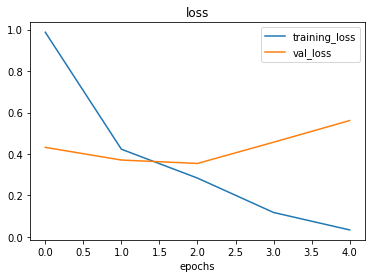

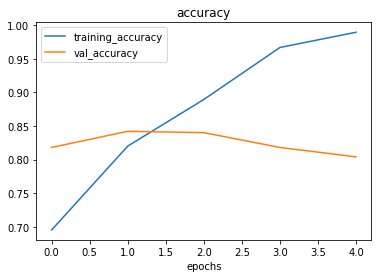

In [39]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and vaalidation decreasing at similar rates), when there are large differences your model may be **overfitting**

### 6. Adjust the model paramters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattended layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (sucha as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **regularization.**

In [40]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")                      
])

In [41]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 0.6340 - accuracy: 0.6300 - val_loss: 0.4663 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4818 - accuracy: 0.7780 - val_loss: 0.3940 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4397 - accuracy: 0.8020 - val_loss: 0.3752 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4136 - accuracy: 0.8220 - val_loss: 0.4279 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3882 - accuracy: 0.8347 - val_loss: 0.3621 - val_accuracy: 0.8300


In [43]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [44]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


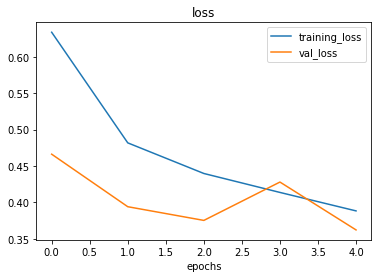

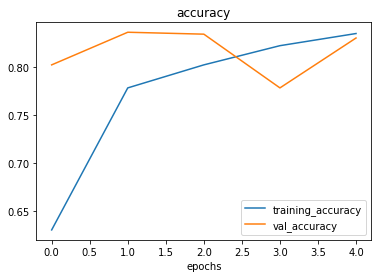

In [45]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly
                                             width_shift_range=0.2, # move your image around the x-axis
                                             height_shift_range=0.2, # move your image aroud the y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test data
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question:** What is data augementation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more gernealizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, fliping it, cropping it or something similar.

Let's wirte some code to visualize data augmentation...

In [63]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224,224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modified as they're loaded into the model. 

Finally... Let's visualize some augmentd data!!

In [50]:
# Get sample augmentd data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented...only data (images)


Showing image number: 22


(-0.5, 223.5, 223.5, -0.5)

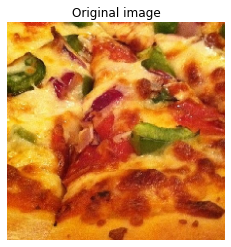

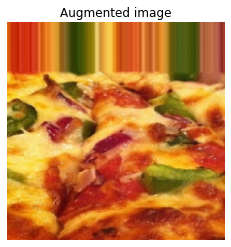

In [56]:
# Show origninal image and augmented image
import random
random_number = random.randint(0,31) # our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [59]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 484ms/step - loss: 0.7033 - accuracy: 0.5660 - val_loss: 0.7169 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 542ms/step - loss: 0.7224 - accuracy: 0.5020 - val_loss: 0.6864 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 22s 470ms/step - loss: 0.7048 - accuracy: 0.5547 - val_loss: 0.6702 - val_accuracy: 0.6480
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6920 - accuracy: 0.5453 - val_loss: 0.6778 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6905 - accuracy: 0.5713 - val_loss: 0.6713 - val_accuracy: 0.7580


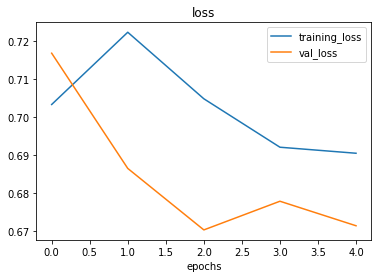

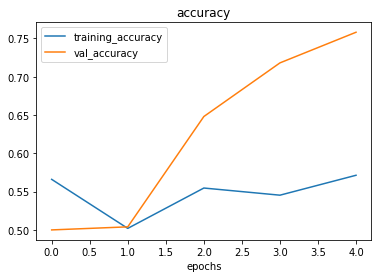

In [60]:
# Check our model training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the smae as before) on it and see what happens.

In [62]:
# Import data and augment and shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [68]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffeld data
                        epochs=6,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/6
47/47 [==============================] - 24s 506ms/step - loss: 0.6882 - accuracy: 0.5500 - val_loss: 0.6359 - val_accuracy: 0.6100
Epoch 2/6
47/47 [==============================] - 22s 469ms/step - loss: 0.6197 - accuracy: 0.6500 - val_loss: 0.4955 - val_accuracy: 0.7980
Epoch 3/6
47/47 [==============================] - 22s 468ms/step - loss: 0.5736 - accuracy: 0.6980 - val_loss: 0.4382 - val_accuracy: 0.8080
Epoch 4/6
47/47 [==============================] - 22s 472ms/step - loss: 0.5036 - accuracy: 0.7640 - val_loss: 0.4220 - val_accuracy: 0.8120
Epoch 5/6
47/47 [==============================] - 22s 470ms/step - loss: 0.5078 - accuracy: 0.7527 - val_loss: 0.3806 - val_accuracy: 0.8280
Epoch 6/6
47/47 [==============================] - 23s 488ms/step - loss: 0.4815 - accuracy: 0.7733 - val_loss: 0.3501 - val_accuracy: 0.8460


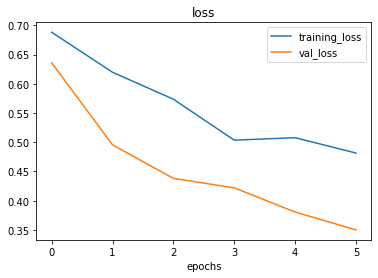

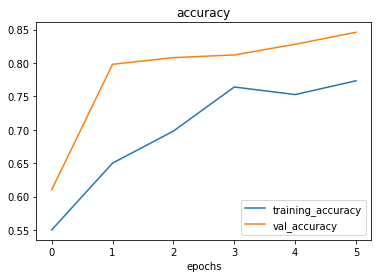

In [69]:
# Plot loss curves
plot_loss_curves(history_7)

> **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time insead of just pizza and then steak). 

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutinoal layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (feve the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

In [74]:
# Create model
model_8 = Sequential([
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),                      
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compile model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 491ms/step - loss: 0.6491 - accuracy: 0.6207 - val_loss: 0.5130 - val_accuracy: 0.7980
Epoch 2/10
47/47 [==============================] - 23s 487ms/step - loss: 0.5231 - accuracy: 0.7500 - val_loss: 0.4135 - val_accuracy: 0.8060
Epoch 3/10
47/47 [==============================] - 23s 488ms/step - loss: 0.4965 - accuracy: 0.7593 - val_loss: 0.4971 - val_accuracy: 0.7500
Epoch 4/10
47/47 [==============================] - 23s 485ms/step - loss: 0.4912 - accuracy: 0.7673 - val_loss: 0.4240 - val_accuracy: 0.8040
Epoch 5/10
47/47 [==============================] - 23s 498ms/step - loss: 0.4586 - accuracy: 0.7900 - val_loss: 0.3145 - val_accuracy: 0.8660
Epoch 6/10
47/47 [==============================] - 22s 478ms/step - loss: 0.4563 - accuracy: 0.7960 - val_loss: 0.3684 - val_accuracy: 0.8360
Epoch 7/10
47/47 [==============================] - 22s 478ms/step - loss: 0.4624 - accuracy: 0.7833 - val_loss: 0.3890 - val_accuracy: 0.8300

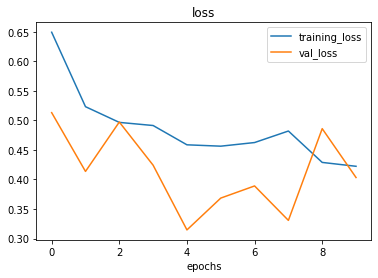

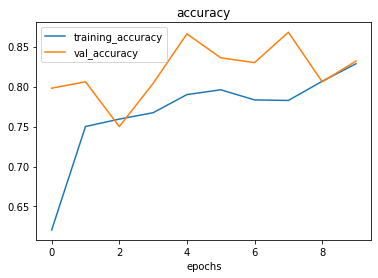

In [75]:
# Plot loss curves
plot_loss_curves(history_8)

## Making a prediction with our trained model on our custom data

In [76]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-07-15 14:26:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3     100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2022-07-15 14:26:51 (93.2 MB/s) - ‘03-steak.jpeg.3’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

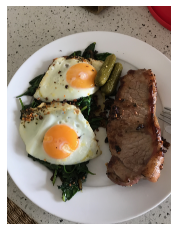

In [80]:
# View our example images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [81]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> **Note:** When you train a neural network and you want to make a prediciton with it on your own custom data, it's important that your custom data (or new data) is the same format as the dta your model was trained on

In [94]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img 

In [96]:
# Load in an preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [101]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.8206152]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [102]:
# Reminde ourselvs of our class names 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [104]:
# We can index the predicted class by rounding the prediciton probability and indexing it on the class name
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [110]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes apredictgion with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

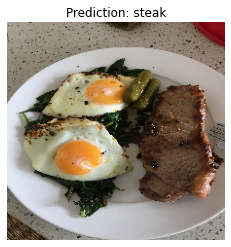

In [112]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza

--2022-07-15 15:01:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-07-15 15:01:20 (204 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



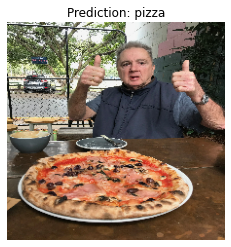

In [114]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Calssification

We've just beedn through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fite the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporve the model ( try to beat baseline/reduce overfitting)
7. Repeat until satisfied

### 1. Become one with the data

In [115]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-15 15:09:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   199MB/s    in 2.5s    

2022-07-15 15:09:55 (199 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [116]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [117]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [118]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['501619.jpg']
Image shape: (512, 512, 3)


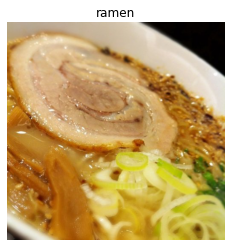

In [126]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [127]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website...
how about we just take their model (also on 10 classes and use it for our problem...

In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [131]:
# Create our model (very similar to prevois models but actually the same as CNN explainer webside)
# Set random seed
tf.random.set_seed(42)

# Create model
model_9 = Sequential([
                      Conv2D(10,3, input_shape=(224,224,3)),
                      Activation(activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation="softmax") # changed to have 10 output neurons and use the softmax activation function             
])

# Compile model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

Epoch 1/5
235/235 [==============================] - 55s 229ms/step - loss: 2.1448 - accuracy: 0.2073 - val_loss: 2.0139 - val_accuracy: 0.2784
Epoch 2/5
235/235 [==============================] - 50s 211ms/step - loss: 1.9160 - accuracy: 0.3325 - val_loss: 1.8823 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 66s 282ms/step - loss: 1.5621 - accuracy: 0.4675 - val_loss: 1.9425 - val_accuracy: 0.3536
Epoch 4/5
235/235 [==============================] - 49s 211ms/step - loss: 0.9764 - accuracy: 0.6817 - val_loss: 2.5090 - val_accuracy: 0.3180
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.3937 - accuracy: 0.8751 - val_loss: 3.5192 - val_accuracy: 0.2936


### 4. Fit the model

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [132]:
len(train_data)

235

### 5. Evaluate the model

In [134]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 15s 180ms/step - loss: 3.5192 - accuracy: 0.2936


[3.5192272663116455, 0.2935999929904938]

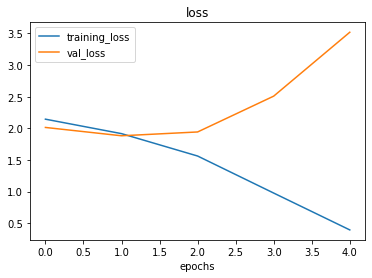

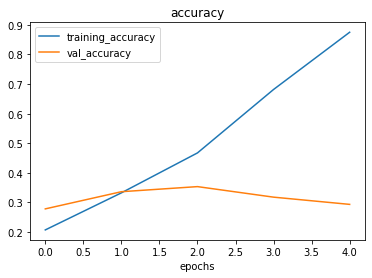

In [136]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_9)

What do these loss curves tell us?

Well... it seams our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to gerneralize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (tp beat the baseline/reduce overfitting)


Due to its performance on the training data, it's clear our model is learning something...
However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [139]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...

# set random seed
tf.random.set_seed(42)

# Create a model
model_10 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

# Compile the model
model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])



In [140]:
model_10.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 29160)             0         
                                                                 
 dense_20 (Dense)            (None, 10)              

In [141]:
model_9.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_42 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_44 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

In [142]:
# Fit the model with 2x conv layers removed
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.1178 - accuracy: 0.2451 - val_loss: 2.0486 - val_accuracy: 0.2844
Epoch 2/5
235/235 [==============================] - 47s 199ms/step - loss: 1.8640 - accuracy: 0.3533 - val_loss: 1.8583 - val_accuracy: 0.3492
Epoch 3/5
235/235 [==============================] - 47s 198ms/step - loss: 1.5286 - accuracy: 0.4920 - val_loss: 1.9061 - val_accuracy: 0.3496
Epoch 4/5
235/235 [==============================] - 57s 244ms/step - loss: 1.0478 - accuracy: 0.6744 - val_loss: 2.0476 - val_accuracy: 0.3368
Epoch 5/5
235/235 [==============================] - 47s 198ms/step - loss: 0.5772 - accuracy: 0.8411 - val_loss: 2.4299 - val_accuracy: 0.3240


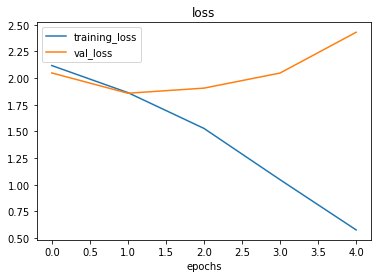

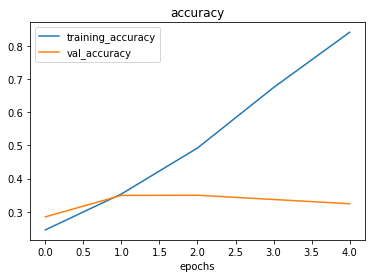

In [143]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [144]:
model_10.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 29160)             0         
                                                                 
 dense_20 (Dense)            (None, 10)              

In [145]:
model_9.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_42 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_44 (Conv2D)          (None, 106, 106, 10)      910       
                                                     

Looks like our "simplifying the model" experiment didn't work... 
How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validtaion accuracy

In [149]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [150]:
# Let's create another model but this time we'll fit it on the augmentd training data of 10 classes
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (using the same setup as previous models)
model_11.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

In [155]:
# Fit the model
history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 532ms/step - loss: 2.2550 - accuracy: 0.1580 - val_loss: 2.1425 - val_accuracy: 0.2212
Epoch 2/5
235/235 [==============================] - 123s 524ms/step - loss: 2.1336 - accuracy: 0.2309 - val_loss: 1.9544 - val_accuracy: 0.3276
Epoch 3/5
235/235 [==============================] - 123s 523ms/step - loss: 2.0593 - accuracy: 0.2784 - val_loss: 1.9250 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 123s 525ms/step - loss: 2.0231 - accuracy: 0.2900 - val_loss: 1.8813 - val_accuracy: 0.3428
Epoch 5/5
235/235 [==============================] - 124s 526ms/step - loss: 1.9790 - accuracy: 0.3113 - val_loss: 1.8556 - val_accuracy: 0.3524


In [156]:
model_9.evaluate(test_data)

79/79 [==============================] - 17s 219ms/step - loss: 3.5192 - accuracy: 0.2936


[3.519226551055908, 0.2935999929904938]

In [157]:
model_11.evaluate(test_data)

79/79 [==============================] - 19s 240ms/step - loss: 1.8556 - accuracy: 0.3524


[1.8556251525878906, 0.352400004863739]

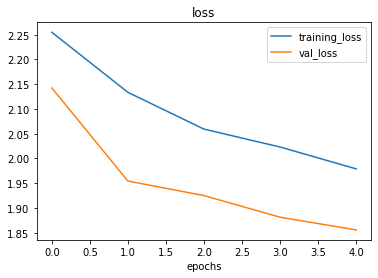

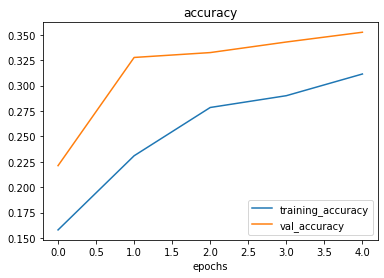

In [158]:
# Check out our model trained on augmented dta's loss curves
plot_loss_curves(history_11)

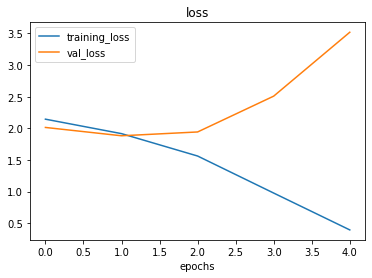

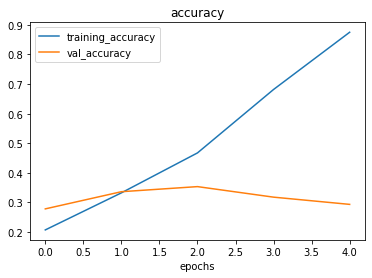

In [159]:
plot_loss_curves(history_9)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continally trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiemtns, namely:

* restructuring our model's architecture (increasing layers/hidden units)
* adjust the learning rate
* try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
* training for longer (e.g. 10 epochs instead of 5 epochs)
* try **transfer learning**


### Making a prediction with our trained model

Let's use our trained model to make some prediction on our own custom images!

In [160]:
# Remind ourselves of the classes our model was trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [161]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-07-15 16:54:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.2’

03-pizza-dad.jpeg.2 100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2022-07-15 16:54:58 (193 MB/s) - ‘03-pizza-dad.jpeg.2’ saved [2874848/2874848]

--2022-07-15 16:54:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting 

In [166]:
# Reconfig pre_and_plot funciton to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes apredictgion with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multiclass and get pre_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

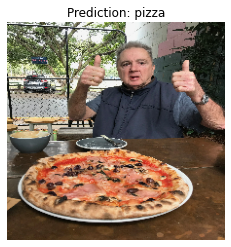

In [167]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-pizza-dad.jpeg", 
              class_names=class_names)

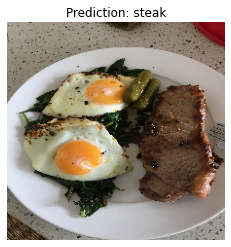

In [168]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

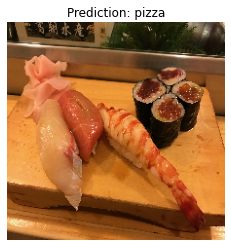

In [169]:
pred_and_plot(model=model_11, 
              filename="03-sushi.jpeg", 
              class_names=class_names)

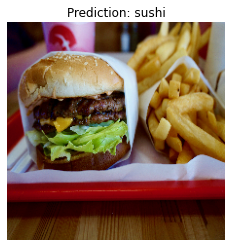

In [170]:
pred_and_plot(model=model_11, 
              filename="03-hamburger.jpeg", 
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data

## Saving and loading our model

In [172]:
# Save a model
model_11.save("saved_trained_model_11")

INFO:tensorflow:Assets written to: saved_trained_model_11/assets


In [173]:
# Load in a trained model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model_11")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 16s 198ms/step - loss: 1.8556 - accuracy: 0.3524


[1.8556245565414429, 0.352400004863739]

In [174]:
# Compare our loaded model to our existing model
model_11.evaluate(test_data)

79/79 [==============================] - 12s 149ms/step - loss: 1.8556 - accuracy: 0.3524


[1.855624794960022, 0.352400004863739]

In [176]:
from google.colab import files
files.download("saved_trained_model_11")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>